# 캔들차트 데이터 생성


참고 : https://dataplay.tistory.com/37?category=845492

참고코드 : https://colab.research.google.com/drive/1WXG3cohwO6_0mbmB9CdT37cc1jfE2Zon

In [ ]:
!pip install mpl_finance
!pip install -U finance_datareader

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import FinanceDataReader as fdr

from shutil import copyfile, move
from mpl_finance import candlestick2_ochl

도지 코인 파일 불러오기


In [ ]:
data =  fdr.DataReader("KS11", '1979-01-01', '2021-06-18')

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-06-16,1249,1259,1227,1233,70480,NaN
1997-06-17,1233,1329,1215,1305,357930,0.058394
1997-06-18,1322,1340,1279,1296,238420,-0.006897
1997-06-19,1304,1304,1263,1269,145140,-0.020833
1997-06-20,1286,1286,1242,1251,150060,-0.014184
...,...,...,...,...,...,...
2021-06-14,80800,80900,80500,80500,10550078,-0.006173
2021-06-15,80900,81200,80600,80900,10075685,0.004969
2021-06-16,81500,81900,81100,81800,14999855,0.011125


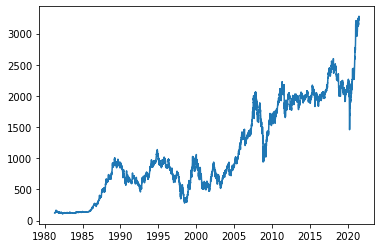

In [ ]:
plt.plot(data['Close'])

In [ ]:
def ohlc2cs2(data, seq_len, dimension):
    # python preprocess.py -m ohlc2cs -l 20 -i stockdatas/EWT_testing.csv -t testing
    print("Converting olhc to candlestick")
    df = data
    plt.style.use('dark_background')
    figs = np.zeros((len(df)-1, dimension, dimension, 3))
    labels = []
    for i in range(0, len(df)-1):
        # ohlc+volume
        c = df.loc[i:i + int(seq_len) - 1, :]
        c_ = df.loc[i:i + int(seq_len), :]
        if len(c) == int(seq_len):
            my_dpi = 96
            fig = plt.figure(figsize=(dimension / my_dpi,
                                      dimension / my_dpi), dpi=my_dpi)
            ax1 = fig.add_subplot(1, 1, 1)
            candlestick2_ochl(ax1, c['Open'], c['Close'], c['High'],
                              c['Low'], width=1,
                              colorup='#77d879', colordown='#db3f3f')
            ax1.grid(False)
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            ax1.xaxis.set_visible(False)
            ax1.yaxis.set_visible(False)
            ax1.axis('off')

            # create the second axis for the volume bar-plot
            # Add a seconds axis for the volume overlay

        starting = c_["Close"].iloc[-2]
        endvalue = c_["Close"].iloc[-1]
        if endvalue > starting :
            label = 1
        else :
            label = 0
        labels.append(label)

        fig.canvas.draw()
        fig_np = np.array(fig.canvas.renderer._renderer)
        figs[i] = fig_np[:,:,:3]

        plt.close(fig)
        # normal length - end

    print("Converting olhc to candlestik finished.")
    return figs, labels

In [ ]:
inputs = data
seq_len = 30
dimension = 48

figures, labels = ohlc2cs2(inputs, seq_len, dimension)

Converting olhc to candlestick
Converting olhc to candlestik finished.


In [ ]:
#위 함수로 생성된 figures는 값의 범위가 0~255 이기 때문에 0~1로 맞춰주기 위해 255로 나눕니다.
figures = figures/255.0
print(np.shape(labels), np.shape(figures))

(10363,) (10363, 48, 48, 3)


데이터 제너레이팅

In [ ]:
def single_stock_generator(chart, labels, batch_size) :
    #output [chart, labels]
    while True :
        stock_batch = np.zeros(shape=(batch_size, dimension, dimension, 3))
        label_batch = np.zeros(shape=(batch_size, ))
        for i in range(batch_size) :
            idx = np.random.randint(len(labels))
            stock_batch[i] = chart[idx]
            label_batch[i] = labels[idx]

        yield stock_batch, label_batch

In [ ]:
train_len = 6943
batch_size = 16
train_gen = single_stock_generator(figures[:train_len], labels[:train_len], batch_size)
test_gen = single_stock_generator(figures[train_len:], labels[train_len:], batch_size)


In [ ]:
tmp_data = next(train_gen)
print("Chart image shape : ",np.shape(tmp_data[0]))
print("Label shape :",np.shape(tmp_data[1]))

Chart image shape :  (16, 48, 48, 3)
Label shape : (16,)


In [ ]:
# 만들어진 차트 이미지 중 하나를 예시로 그려보겠습니다.
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
len(tmp_data[0][0][:,:,:])

48

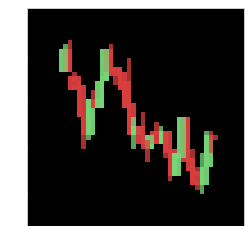

In [ ]:
plt.figure()
plt.imshow(tmp_data[0][15][:,:,:])
plt.show()

# 모듈, 라이브러리 설치

In [ ]:
# Keras의 Functional APi를 이용할 거라서 불러와줍니다.
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix, mean_squared_error

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas import get_dummies
import xgboost as xgb
import scipy
import math
import json
import sys
import csv
import os
import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from tqdm import tqdm_notebook



# ANN


참고 코드 : https://colab.research.google.com/drive/1rIylR9RWEckndbyFNx1Wl_yUQZUF-wyI#scrollTo=70zNPAmbZcGh

In [ ]:
inputs = keras.Input(shape=(48, 48, 3))
x = inputs
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)
outputs = x

ANN = keras.Model(inputs, outputs)
ANN.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6912)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                221216    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 221,249
Trainable params: 221,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4

for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        y_batch = y_batch.reshape(-1,1)
        y_ = ANN(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        y_batch = y_batch.reshape(-1,1)
        y_= ANN(x_batch)
        loss_value2 = loss_fn(y_batch, y_)
        acc_value2 = acc_fn(y_batch, y_)
        val_loss_avg(loss_value2)
        val_acc_avg(acc_value2)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

ANN_loss = float(format(val_loss_avg.result()))
ANN_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.69714 , Train acc: 0.51196
Val_Loss: 0.696, Val_acc: 0.505
Epoch 001: , Train Loss: 0.69696 , Train acc: 0.50842
Val_Loss: 0.695, Val_acc: 0.509
Epoch 002: , Train Loss: 0.69332 , Train acc: 0.51046
Val_Loss: 0.702, Val_acc: 0.511
Epoch 003: , Train Loss: 0.69659 , Train acc: 0.51142
Val_Loss: 0.702, Val_acc: 0.511
Epoch 004: , Train Loss: 0.69579 , Train acc: 0.51073
Val_Loss: 0.697, Val_acc: 0.512
Epoch 005: , Train Loss: 0.69746 , Train acc: 0.51116
Val_Loss: 0.701, Val_acc: 0.511
Epoch 006: , Train Loss: 0.69528 , Train acc: 0.51076
Val_Loss: 0.701, Val_acc: 0.510
Epoch 007: , Train Loss: 0.69356 , Train acc: 0.51082
Val_Loss: 0.692, Val_acc: 0.511
Epoch 008: , Train Loss: 0.69668 , Train acc: 0.51125
Val_Loss: 0.693, Val_acc: 0.511
Epoch 009: , Train Loss: 0.69552 , Train acc: 0.51182
Val_Loss: 0.699, Val_acc: 0.512
Epoch 010: , Train Loss: 0.69498 , Train acc: 0.51203
Val_Loss: 0.696, Val_acc: 0.512


In [ ]:
ANN_ACC

0.5120896100997925

# 1D CNN

In [ ]:
inputs = keras.Input(shape=(48, 48, 3))
x = inputs
x = layers.Conv1D(filters=32, kernel_size=5, padding="causal",activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(1, activation='sigmoid')(x)
outputs = x

CNN1D = keras.Model(inputs, outputs)
CNN1D.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 48, 48, 32)        512       
_________________________________________________________________
flatten_4 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                1179664   
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 1,180,193
Trainable params: 1,180,193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        y_batch = y_batch.reshape(-1,1)
        y_ = CNN1D(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        y_batch = y_batch.reshape(-1,1)
        y_= CNN1D(x_batch)
        loss_value2 = loss_fn(y_batch, y_)
        acc_value2 = acc_fn(y_batch, y_)
        val_loss_avg(loss_value2)
        val_acc_avg(acc_value2)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

CNN1D_loss = float(format(val_loss_avg.result()))
CNN1D_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.69347 , Train acc: 0.48677
Val_Loss: 0.693, Val_acc: 0.496
Epoch 001: , Train Loss: 0.69368 , Train acc: 0.49155
Val_Loss: 0.694, Val_acc: 0.490
Epoch 002: , Train Loss: 0.69332 , Train acc: 0.49082
Val_Loss: 0.694, Val_acc: 0.492
Epoch 003: , Train Loss: 0.69330 , Train acc: 0.49245
Val_Loss: 0.694, Val_acc: 0.492
Epoch 004: , Train Loss: 0.69325 , Train acc: 0.49369
Val_Loss: 0.694, Val_acc: 0.493
Epoch 005: , Train Loss: 0.69328 , Train acc: 0.49348
Val_Loss: 0.694, Val_acc: 0.493
Epoch 006: , Train Loss: 0.69298 , Train acc: 0.49375
Val_Loss: 0.694, Val_acc: 0.495
Epoch 007: , Train Loss: 0.69319 , Train acc: 0.49551
Val_Loss: 0.695, Val_acc: 0.495
Epoch 008: , Train Loss: 0.69311 , Train acc: 0.49535
Val_Loss: 0.693, Val_acc: 0.496
Epoch 009: , Train Loss: 0.69323 , Train acc: 0.49614
Val_Loss: 0.694, Val_acc: 0.496
Epoch 010: , Train Loss: 0.69336 , Train acc: 0.49594
Val_Loss: 0.694, Val_acc: 0.496


In [ ]:
CNN1D_ACC

0.49559661746025085

# CNN

참고 논문 : Using Deep Learning Neural Networks and Candlestick chart Representation to Predict Stock Market
https://arxiv.org/pdf/1903.12258.pdf

다음날 종가가 상승이냐 아니냐를 맞추는 binary classification 문제

In [ ]:
inputs = keras.Input(shape=(48, 48, 3))
x = inputs
x = layers.Conv2D(48, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(rate=0.5)(x)
x = layers.Conv2D(96, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(rate=0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(1, activation='sigmoid')(x)
outputs = x

CNN = keras.Model(inputs, outputs)
CNN.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 48)        1344      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 96)        41568     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 96)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 96)        0   

In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        y_batch = y_batch.reshape(-1,1)
        y_ = CNN(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        y_batch = y_batch.reshape(-1,1)
        y_= CNN(x_batch)
        loss_value2 = loss_fn(y_batch, y_)
        acc_value2 = acc_fn(y_batch, y_)
        val_loss_avg(loss_value2)
        val_acc_avg(acc_value2)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

CNN_loss = float(format(val_loss_avg.result()))
CNN_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.69399 , Train acc: 0.48474
Val_Loss: 0.696, Val_acc: 0.484
Epoch 001: , Train Loss: 0.69400 , Train acc: 0.48308
Val_Loss: 0.694, Val_acc: 0.486
Epoch 002: , Train Loss: 0.69403 , Train acc: 0.48516
Val_Loss: 0.695, Val_acc: 0.485
Epoch 003: , Train Loss: 0.69469 , Train acc: 0.48453
Val_Loss: 0.694, Val_acc: 0.484
Epoch 004: , Train Loss: 0.69421 , Train acc: 0.48476
Val_Loss: 0.697, Val_acc: 0.484
Epoch 005: , Train Loss: 0.69422 , Train acc: 0.48365
Val_Loss: 0.694, Val_acc: 0.484
Epoch 006: , Train Loss: 0.69431 , Train acc: 0.48448
Val_Loss: 0.696, Val_acc: 0.484
Epoch 007: , Train Loss: 0.69366 , Train acc: 0.48441
Val_Loss: 0.695, Val_acc: 0.485
Epoch 008: , Train Loss: 0.69390 , Train acc: 0.48508
Val_Loss: 0.695, Val_acc: 0.485
Epoch 009: , Train Loss: 0.69387 , Train acc: 0.48562
Val_Loss: 0.694, Val_acc: 0.486
Epoch 010: , Train Loss: 0.69393 , Train acc: 0.48569
Val_Loss: 0.695, Val_acc: 0.486


# GRU


소스코드 : https://github.com/zutshianand/Stock-Price-Prediction/blob/master/main.ipynb

In [ ]:
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(2304, 3), activation='tanh'))
# The output layer
regressorGRU.add(Dense(units=1))
regressorGRU.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 2304, 50)          8250      
_________________________________________________________________
dense_16 (Dense)             (None, 2304, 1)           51        
Total params: 8,301
Trainable params: 8,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        x_batch = x_batch.reshape(16, 2304, 3)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_= regressorGRU(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        val_loss_avg(loss_value)
        val_acc_avg(acc_value)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

GRU_loss = float(format(val_loss_avg.result()))
GRU_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.69058 , Train acc: 0.48567
Val_Loss: 8.266, Val_acc: 0.459
Epoch 001: , Train Loss: 8.67652 , Train acc: 0.46412
Val_Loss: 8.087, Val_acc: 0.470
Epoch 002: , Train Loss: 11.56870 , Train acc: 0.46991
Val_Loss: 8.052, Val_acc: 0.471
Epoch 003: , Train Loss: 7.71246 , Train acc: 0.47261
Val_Loss: 8.239, Val_acc: 0.473
Epoch 004: , Train Loss: 9.64061 , Train acc: 0.47092
Val_Loss: 8.052, Val_acc: 0.472
Epoch 005: , Train Loss: 11.56870 , Train acc: 0.47234
Val_Loss: 7.998, Val_acc: 0.473
Epoch 006: , Train Loss: 9.64061 , Train acc: 0.47386
Val_Loss: 7.927, Val_acc: 0.475
Epoch 007: , Train Loss: 10.60467 , Train acc: 0.47561
Val_Loss: 8.364, Val_acc: 0.475
Epoch 008: , Train Loss: 6.74845 , Train acc: 0.47338
Val_Loss: 7.748, Val_acc: 0.475
Epoch 009: , Train Loss: 5.78435 , Train acc: 0.47608
Val_Loss: 8.034, Val_acc: 0.476
Epoch 010: , Train Loss: 7.71246 , Train acc: 0.47639
Val_Loss: 7.909, Val_acc: 0.477


In [ ]:
GRU_ACC

0.47687822580337524

# LSTM

shape 확인 기존 48,48,3 -> 48,3으로 변경

In [ ]:
inputs = keras.Input(shape=(2304, 3))
x = inputs
# First LSTM layer with Dropout regularisation
x = layers.LSTM(units=32, return_sequences=True)(x)
x = layers.Dropout(rate=0.5)(x)
# Second LSTM layer
x = layers.LSTM(units=32, return_sequences=True)(x)
x = layers.Dropout(rate=0.5)(x)
# Third LSTM layer
x = layers.LSTM(units=32, return_sequences=True)(x)
x = layers.Dropout(rate=0.5)(x)
# Fourth LSTM layer
x = layers.LSTM(units=32, return_sequences=True)(x)
x = layers.Dropout(rate=0.5)(x)
# The output layer
x = layers.Dense(1)(x)
outputs = x

LSTM = keras.Model(inputs, outputs)
LSTM.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 2304, 3)]         0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 2304, 32)          4608      
_________________________________________________________________
dropout_8 (Dropout)          (None, 2304, 32)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 2304, 32)          8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 2304, 32)          0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 2304, 32)          8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 2304, 32)          0   

In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_ = LSTM(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg.update_state(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_= LSTM(x_batch)
        loss_value2 = loss_fn(y_batch, y_)
        acc_value2 = acc_fn(y_batch, y_)
        val_loss_avg.update_state(loss_value2)
        val_acc_avg(acc_value2)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

LSTM_loss = float(format(val_loss_avg.result()))
LSTM_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 7.76814 , Train acc: 0.48606
Val_Loss: 8.070, Val_acc: 0.494
Epoch 001: , Train Loss: 7.64123 , Train acc: 0.49421
Val_Loss: 8.364, Val_acc: 0.495
Epoch 002: , Train Loss: 7.78373 , Train acc: 0.49485
Val_Loss: 7.962, Val_acc: 0.494
Epoch 003: , Train Loss: 7.89728 , Train acc: 0.49304
Val_Loss: 8.105, Val_acc: 0.492
Epoch 004: , Train Loss: 7.70135 , Train acc: 0.49226
Val_Loss: 8.132, Val_acc: 0.493
Epoch 005: , Train Loss: 7.81267 , Train acc: 0.49259
Val_Loss: 8.239, Val_acc: 0.492
Epoch 006: , Train Loss: 7.67463 , Train acc: 0.49240
Val_Loss: 8.025, Val_acc: 0.493
Epoch 007: , Train Loss: 7.68799 , Train acc: 0.49295
Val_Loss: 8.266, Val_acc: 0.493
Epoch 008: , Train Loss: 7.85275 , Train acc: 0.49252
Val_Loss: 8.293, Val_acc: 0.492
Epoch 009: , Train Loss: 7.89727 , Train acc: 0.49192
Val_Loss: 8.302, Val_acc: 0.491
Epoch 010: , Train Loss: 7.82380 , Train acc: 0.49085
Val_Loss: 7.864, Val_acc: 0.491


In [ ]:
LSTM_ACC

0.4910687804222107

# BLSTM

소스코드 : https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed

In [ ]:
BL = Sequential()
BL.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(2304, 3)))
BL.add(TimeDistributed(Dense(1, activation='sigmoid')))
BL.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 2304, 40)          3840      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 2304, 1)           41        
Total params: 3,881
Trainable params: 3,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_ = BL(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_= BL(x_batch)
        loss_value2 = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        val_loss_avg(loss_value2)
        val_acc_avg(acc_value)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

BLSTM_loss = float(format(val_loss_avg.result()))
BLSTM_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.70747 , Train acc: 0.51776
Val_Loss: 0.699, Val_acc: 0.513
Epoch 001: , Train Loss: 0.71378 , Train acc: 0.50891
Val_Loss: 0.697, Val_acc: 0.507
Epoch 002: , Train Loss: 0.70835 , Train acc: 0.50824
Val_Loss: 0.700, Val_acc: 0.509
Epoch 003: , Train Loss: 0.70752 , Train acc: 0.51000
Val_Loss: 0.698, Val_acc: 0.511
Epoch 004: , Train Loss: 0.71164 , Train acc: 0.50994
Val_Loss: 0.697, Val_acc: 0.510
Epoch 005: , Train Loss: 0.70796 , Train acc: 0.51039
Val_Loss: 0.703, Val_acc: 0.510
Epoch 006: , Train Loss: 0.71098 , Train acc: 0.51012
Val_Loss: 0.696, Val_acc: 0.510
Epoch 007: , Train Loss: 0.71153 , Train acc: 0.50948
Val_Loss: 0.698, Val_acc: 0.510
Epoch 008: , Train Loss: 0.71076 , Train acc: 0.50965
Val_Loss: 0.705, Val_acc: 0.509
Epoch 009: , Train Loss: 0.70988 , Train acc: 0.50899
Val_Loss: 0.704, Val_acc: 0.509
Epoch 010: , Train Loss: 0.71021 , Train acc: 0.50890
Val_Loss: 0.705, Val_acc: 0.509


In [ ]:
BLSTM_ACC

0.5086075663566589

# Convlstm2D

참고 : https://deep-deep-deep.tistory.com/32 [딥딥딥]

소스 코드 : https://keras.io/examples/vision/conv_lstm/

CNN 관련 : http://taewan.kim/post/cnn/

In [ ]:
seq = keras.Sequential(
    [
        keras.Input(
            shape=(48, 48, 3, 1)
        ),  # Variable-length sequence of 40x40x1 frames
        layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True

        ),
        layers.BatchNormalization(),
        layers.Conv3D(
            filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
        ),
    ]
)
seq.compile(loss="binary_crossentropy", optimizer="adadelta")

In [ ]:
seq.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 48, 48, 3, 40)     59200     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 3, 40)     160       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 48, 48, 3, 1)      1081      
Total params: 60,441
Trainable params: 60,361
Non-trainable params: 80
_________________________________________________________________


In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        x_batch = x_batch.reshape(16, 48, 48, 3, 1)
        y_ = seq(x_batch)[0]
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        x_batch = x_batch.reshape(16, 48, 48, 3, 1)
        y_= seq(x_batch)[0]
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        val_loss_avg(loss_value)
        val_acc_avg(acc_value)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

Convlstm2D_loss = float(format(val_loss_avg.result()))
Convlstm2D_acc = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.69316 , Train acc: 0.49874
Val_Loss: 0.693, Val_acc: 0.501
Epoch 001: , Train Loss: 0.69316 , Train acc: 0.49974
Val_Loss: 0.693, Val_acc: 0.498
Epoch 002: , Train Loss: 0.69316 , Train acc: 0.49844
Val_Loss: 0.693, Val_acc: 0.498
Epoch 003: , Train Loss: 0.69316 , Train acc: 0.49784
Val_Loss: 0.693, Val_acc: 0.498
Epoch 004: , Train Loss: 0.69316 , Train acc: 0.49786
Val_Loss: 0.693, Val_acc: 0.498
Epoch 005: , Train Loss: 0.69316 , Train acc: 0.49780
Val_Loss: 0.693, Val_acc: 0.498
Epoch 006: , Train Loss: 0.69316 , Train acc: 0.49793
Val_Loss: 0.693, Val_acc: 0.498
Epoch 007: , Train Loss: 0.69316 , Train acc: 0.49777
Val_Loss: 0.693, Val_acc: 0.498
Epoch 008: , Train Loss: 0.69316 , Train acc: 0.49776
Val_Loss: 0.693, Val_acc: 0.498
Epoch 009: , Train Loss: 0.69316 , Train acc: 0.49795
Val_Loss: 0.693, Val_acc: 0.498
Epoch 010: , Train Loss: 0.69316 , Train acc: 0.49807
Val_Loss: 0.693, Val_acc: 0.498


In [ ]:
Convlstm2D_acc

0.49788638949394226

 # CNN-LSTM

소스 코드 : https://colab.research.google.com/drive/1rIylR9RWEckndbyFNx1Wl_yUQZUF-wyI#scrollTo=M1QKFdJOYTjx

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda, ConvLSTM2D, Flatten
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
inputs = keras.Input(shape=(2304, 3))
x = inputs
# 1차원 feature map 생성
x = layers.Conv1D(filters=32, kernel_size=5, padding="causal", activation="relu")(x)
# LSTM
x = layers.LSTM(16, activation='tanh')(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(1, activation='sigmoid')(x)
outputs = x

M10 = keras.Model(inputs, outputs)
M10.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 2304, 3)]         0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 2304, 32)          512       
_________________________________________________________________
lstm_12 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 3,937
Trainable params: 3,937
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_ = M10(x_batch)
        y_batch = y_batch.reshape(-1,1)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_= M10(x_batch)
        y_batch = y_batch.reshape(-1,1)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        val_loss_avg(loss_value)
        val_acc_avg(acc_value)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

CNN_LSTM_loss = float(format(val_loss_avg.result()))
CNN_LSTM_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.69307 , Train acc: 0.50476
Val_Loss: 0.694, Val_acc: 0.506
Epoch 001: , Train Loss: 0.69366 , Train acc: 0.50379
Val_Loss: 0.694, Val_acc: 0.501
Epoch 002: , Train Loss: 0.69327 , Train acc: 0.50175
Val_Loss: 0.693, Val_acc: 0.502
Epoch 003: , Train Loss: 0.69328 , Train acc: 0.50215
Val_Loss: 0.694, Val_acc: 0.502
Epoch 004: , Train Loss: 0.69324 , Train acc: 0.50203
Val_Loss: 0.694, Val_acc: 0.502
Epoch 005: , Train Loss: 0.69364 , Train acc: 0.50222
Val_Loss: 0.692, Val_acc: 0.503
Epoch 006: , Train Loss: 0.69357 , Train acc: 0.50211
Val_Loss: 0.693, Val_acc: 0.502
Epoch 007: , Train Loss: 0.69320 , Train acc: 0.50244
Val_Loss: 0.693, Val_acc: 0.502
Epoch 008: , Train Loss: 0.69391 , Train acc: 0.50216
Val_Loss: 0.692, Val_acc: 0.502
Epoch 009: , Train Loss: 0.69405 , Train acc: 0.50119
Val_Loss: 0.693, Val_acc: 0.501
Epoch 010: , Train Loss: 0.69304 , Train acc: 0.50123
Val_Loss: 0.693, Val_acc: 0.502


In [ ]:
CNN_LSTM_ACC

0.5015603303909302

# CNN-BLSTM

In [ ]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

In [ ]:
inputs = keras.Input(shape=(2304, 3))
x = inputs
# 1차원 feature map 생성
x = layers.Conv1D(filters=32, kernel_size=5, padding="causal", activation="relu")(x)
# LSTM
x = layers.Bidirectional(LSTM(20, return_sequences=True))(x)
x = layers.TimeDistributed(Dense(1, activation='sigmoid'))(x)
outputs = x

M11 = keras.Model(inputs, outputs)
M11.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 2304, 3)]         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 2304, 32)          512       
_________________________________________________________________
bidirectional_3 (Bidirection (None, 2304, 40)          8480      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 2304, 1)           41        
Total params: 9,033
Trainable params: 9,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_ = M11(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_= M11(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        val_loss_avg(loss_value)
        val_acc_avg(acc_value)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

CNN_BLSTM_loss = float(format(val_loss_avg.result()))
CNN_BLSTM_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.69547 , Train acc: 0.49239
Val_Loss: 0.698, Val_acc: 0.487
Epoch 001: , Train Loss: 0.69431 , Train acc: 0.48830
Val_Loss: 0.700, Val_acc: 0.490
Epoch 002: , Train Loss: 0.69463 , Train acc: 0.48988
Val_Loss: 0.696, Val_acc: 0.491
Epoch 003: , Train Loss: 0.69557 , Train acc: 0.49004
Val_Loss: 0.699, Val_acc: 0.489
Epoch 004: , Train Loss: 0.69468 , Train acc: 0.48898
Val_Loss: 0.695, Val_acc: 0.490
Epoch 005: , Train Loss: 0.69452 , Train acc: 0.49087
Val_Loss: 0.694, Val_acc: 0.492
Epoch 006: , Train Loss: 0.69533 , Train acc: 0.49192
Val_Loss: 0.695, Val_acc: 0.492
Epoch 007: , Train Loss: 0.69501 , Train acc: 0.49194
Val_Loss: 0.697, Val_acc: 0.492
Epoch 008: , Train Loss: 0.69437 , Train acc: 0.49232
Val_Loss: 0.697, Val_acc: 0.492
Epoch 009: , Train Loss: 0.69479 , Train acc: 0.49212
Val_Loss: 0.698, Val_acc: 0.492
Epoch 010: , Train Loss: 0.69464 , Train acc: 0.49222
Val_Loss: 0.698, Val_acc: 0.492


In [ ]:
CNN_BLSTM_ACC

0.49216732382774353

# Model Comparison

In [ ]:
models = pd.DataFrame({
    'Model': ['CNN','ANN', 'GRU', '1D CNN', 'LSTM', 'BLSTM', 'Convlstm2D', 'CNN-LSTM ','CNN-BLSTM'],
    'Score': [CNN_ACC, ANN_ACC, GRU_ACC, CNN1D_ACC, LSTM_ACC, BLSTM_ACC, Convlstm2D_acc, CNN_LSTM_ACC, CNN_BLSTM_ACC]})
models.sort_values (by='Score', ascending=False)

,Model,Score
1,ANN,0.512090
5,BLSTM,0.508608
7,CNN-LSTM,0.501560
6,Convlstm2D,0.497886
3,1D CNN,0.495597
8,CNN-BLSTM,0.492167
4,LSTM,0.491069
0,CNN,0.485658
2,GRU,0.476878
